ISS Position


/var/folders/2w/1v64qkf12w716lkbh7grkq4r0000gn/T/ipykernel_54478/1466703216.py:21: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  human_time = datetime.utcfromtimestamp(timestamp).strftime('%Y-%m-%d %H:%M:%S')


1/100 - Time: 2025-07-03 16:34:56, Latitude: -41.7815, Longitude: 9.5291
2/100 - Time: 2025-07-03 16:35:07, Latitude: -41.3667, Longitude: 10.3054
3/100 - Time: 2025-07-03 16:35:18, Latitude: -40.9829, Longitude: 11.0051
4/100 - Time: 2025-07-03 16:35:28, Latitude: -40.5944, Longitude: 11.6961
5/100 - Time: 2025-07-03 16:35:43, Latitude: -40.0313, Longitude: 12.6685
6/100 - Time: 2025-07-03 16:35:53, Latitude: -39.6509, Longitude: 13.3073
7/100 - Time: 2025-07-03 16:36:05, Latitude: -39.2085, Longitude: 14.0326
8/100 - Time: 2025-07-03 16:36:20, Latitude: -38.6436, Longitude: 14.9332
9/100 - Time: 2025-07-03 16:36:30, Latitude: -38.2295, Longitude: 15.5762
10/100 - Time: 2025-07-03 16:36:42, Latitude: -37.7716, Longitude: 16.2711
11/100 - Time: 2025-07-03 16:36:52, Latitude: -37.3494, Longitude: 16.8977
12/100 - Time: 2025-07-03 16:37:03, Latitude: -36.9234, Longitude: 17.5167
13/100 - Time: 2025-07-03 16:37:13, Latitude: -36.4938, Longitude: 18.1283
14/100 - Time: 2025-07-03 16:37:29,

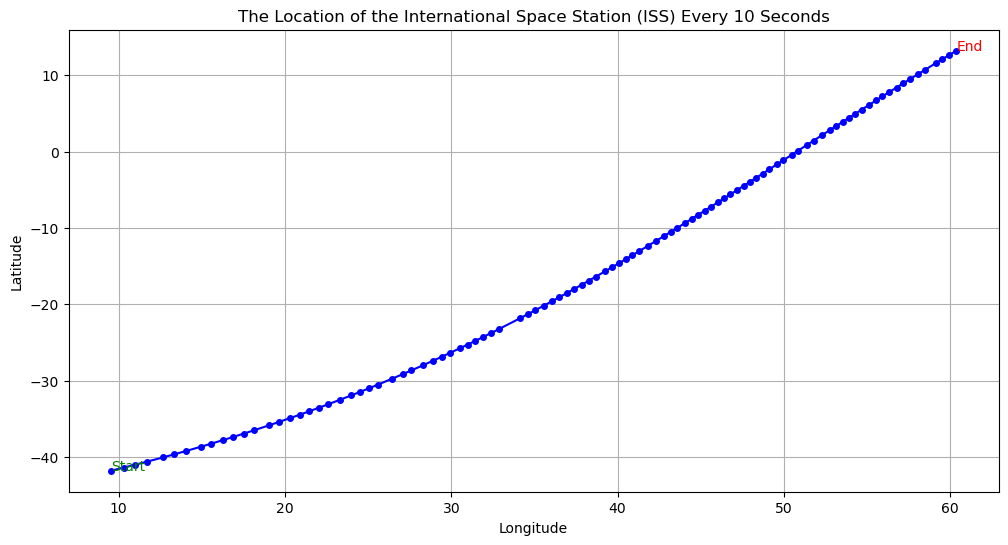

In [24]:
import requests
import time
import matplotlib.pyplot as plt
from datetime import datetime

# ISS data
latitudes = []
longitudes = []
timestamps = []

print("ISS Position")
for i in range(100):
    response = requests.get("http://api.open-notify.org/iss-now.json") 
    loc = response.json()

    lati = float(loc['iss_position']['latitude'])
    long = float(loc['iss_position']['longitude'])
    timestamp = loc['timestamp']

    # Convert timestamp to readable format
    human_time = datetime.utcfromtimestamp(timestamp).strftime('%Y-%m-%d %H:%M:%S')
    
    # Store data
    latitudes.append(lati)
    longitudes.append(long)
    timestamps.append(human_time)

    print(f"{i+1}/100 - Time: {human_time}, Latitude: {lati}, Longitude: {long}")
    time.sleep(10)  # Wait 10 seconds

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(longitudes, latitudes, marker='o', linestyle='-', color='blue', markersize=4)

# Start and end
plt.annotate("Start", (longitudes[0], latitudes[0]), color='green')
plt.annotate("End", (longitudes[-1], latitudes[-1]), color='red')

plt.title("The Location of the International Space Station (ISS) Every 10 Seconds")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.show()
